In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(1)
#parameters
rad = 10
thk = 5
j = np.arange(0.2,5.1,0.2).tolist()
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

def sign(x):
    if x >= 0:
        return 1
    else:
        return -1

def Judge(x,w):
    flag = 1
    for i in x:
        if sign(i[:3].dot(w))*i[-1] < 0:
            flag = 0
            break
    return flag 

In [4]:
out=[]
for sep in j: 
  #n data points,(x1,y1) are the coordinates of the top semi-circle
    
    top,bottom = generatedata(rad,thk,sep,1000)

    X1 = [i[0] for i in top]
    Y1 = [i[1] for i in top]
    X2 = [i[0] for i in bottom]
    Y2 = [i[1] for i in bottom]
    x1 = [[1] + i + [1] for i in top]
    x2 = [[1] + i + [-1] for i in bottom]
    data = x1 + x2
    
    data = np.array(data)
    np.random.shuffle(data)
    
    s = 0
    #initilizew=[0,0]
    w=np.array([-2,-3,0],dtype = float)
    while (Judge(data,w) == 0):
        i = data[random.randint(0,2*100-1)]
        if sign(i[:3].dot(w))*i[-1]<0:
            w += i[-1]*i[:3]
            s += 1
        else:
            break
    out.append(s)

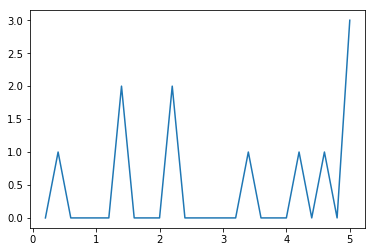

In [5]:
plt.plot(j,out)